## Experiment No.10 : K-means Clustering.
### Name : Tanvi Tulshidas Shinde.
### Roll No. 2.

### Import the Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Import the K-means Clustering
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

### Read Given Dataset

In [2]:
df = pd.read_csv("../datasets/Country_clusters.csv")

### Data Preprocessing 

In [3]:
df

,Unnamed: 0,Country,Lattitude,Longitude,Language
0,0,USA,44.97,-103.77,English
1,1,Canada,62.40,-96.80,Canadian
2,2,France,46.75,2.40,French0
3,3,UK,54.01,-2.53,English
4,4,Germany,51.15,10.40,German
5,5,Austrelia,-25.45,133.11,English


In [4]:
df.drop("Unnamed: 0",axis=1,inplace =True)
df

,Country,Lattitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,Canadian
2,France,46.75,2.40,French0
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German
5,Austrelia,-25.45,133.11,English


In [5]:
x = df['Lattitude'].values
y = df['Longitude'].values
df = df[['Lattitude','Longitude']].values

In [6]:
minmaxscaler=  MinMaxScaler()
df =minmaxscaler.fit_transform(df)

In [7]:
df

array([[0.80159363, 0.        ],
       [1.        , 0.02942418],
       [0.82185544, 0.44820162],
       [0.9044963 , 0.4273894 ],
       [0.87194081, 0.481974  ],
       [0.        , 1.        ]])

In [8]:
wcss = []

### Initialize the model

### Fit the dataset

In [9]:
for i in range(1,len(df)):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

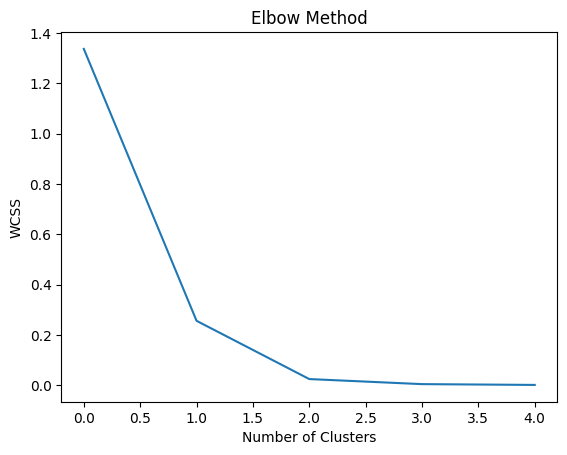

In [10]:
plt.plot(wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")

In [11]:
silhouette_scores = []
k_range = range(2,6)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42) # n_init for robust centroid initialization
    kmeans.fit(df)
    cluster_labels = kmeans.labels_
    score = silhouette_score(df, cluster_labels)
    silhouette_scores.append(score)

In [12]:
silhouette_scores

[0.6087700179621462,
 0.6076270764145225,
 0.42069300719162905,
 0.05678211134562649]

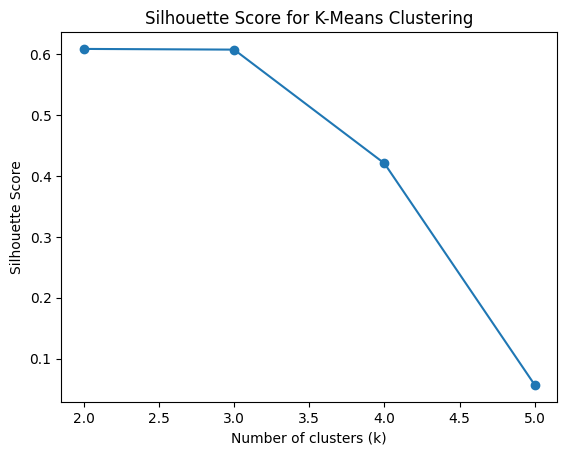

In [13]:
plt.plot(k_range, silhouette_scores, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for K-Means Clustering")
plt.show()


### Plot the scatter plot & visualize the clusters

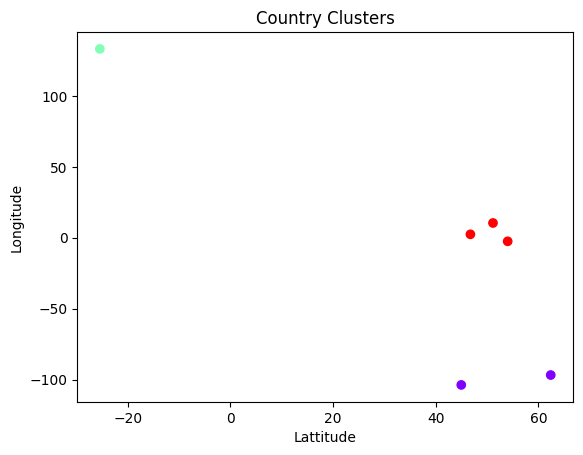

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
plt.title("Country Clusters")
plt.scatter(x, y, c=kmeans.labels_,cmap='rainbow')
plt.xlabel("Lattitude")
plt.ylabel("Longitude")
plt.show()